# Reading Agilent GCMS Files with `chemtbd`

Currently there is a hiearchy of objects for reading GCMS data:

- `AgilentGcmsDataMs` object will read a `.D` `DATA.MS` file into `chromatogram` and `spectra` DataFrames.
- `AgilentGcmsResults` object will read a `.D` `RESULTS.CSV` file into `tic`, `lib` and `fid` DataFrames.
- `AgilentGcms` will read both `DATA.MS` and `RESULTS.CSV` into datat frames from one or more `.D` directories.

To get started let's look at `AgilentGcms`:

In [11]:
from valence.build import AgilentGcms

`AgilentGcms` has three main constructors:

- `from_dir` expects a path to single Agilent `.D` directory as input
- `from_root` expects a path to a parent directory containing one or more `.D` directories as children
- `()` expects a list of one or more paths to Agilent `.D` directories

For example, let's load all `.D` folders from the directory `data/test3`:

In [12]:
agi = AgilentGcms.from_root('data/test3')

Let's look at what `.D` folders loaded from the above directory:

In [13]:
agi.keys

dict_keys(['FA01.D', 'FA02.D', 'FA03.D', 'FA04.D', 'FA05.D', 'FA06.D', 'FA07.D', 'FA08.D', 'FA09.D', 'FA10.D', 'FA11.D', 'FA12.D', 'FA13.D', 'FA14.D', 'FA15.D'])

# Accessing all Files

We can access the __RESULTS.CSV__ `lib`, `fid`, and `tic` tables from all Agilent directories as a single pandas DataFrame using the below commands.

In [14]:
agi.results_lib.head()

,header=,pk,rt,pct_area,library_id,ref,cas,qual
key,,,,,,,,
FA03.D,1=,1.0,5.7877,2.0335,Methyl octanoate,17.0,000000-00-0,96.0
FA03.D,2=,2.0,7.3441,3.4015,Methyl decanoate,1.0,000000-00-0,98.0
FA03.D,3=,3.0,8.0364,1.7448,Methyl undecanoate,2.0,000000-00-0,98.0
FA03.D,4=,4.0,8.6715,3.9674,Methyl dodecanoate,3.0,000000-00-0,98.0
FA03.D,5=,5.0,9.2781,1.9607,Methyl tridecanoate,4.0,000000-00-0,99.0


In [15]:
agi.results_fid.head()

,header=,peak,rt,first,end,pk_ty,height,area,pct_max,pct_total
key,,,,,,,,,,
FA03.D,1=,1,6.250716,5.938180,6.563252,M,2578080,14894660,1,1.962
FA03.D,2=,2,7.858187,7.465278,8.251096,M,9647430,24914490,1,3.282
FA03.D,3=,3,8.357856,7.939963,8.775749,M,6084180,12779820,1,1.683
FA03.D,4=,4,9.798795,9.308855,10.288735,M,19290490,29059610,1,3.828
FA03.D,5=,5,10.669815,10.136324,11.203306,M,8825210,14361540,1,1.892


In [16]:
agi.results_tic.head()

,header=,peak,rt,first,max,last,pk_ty,height,area,pct_max,pct_total
key,,,,,,,,,,,
FA01.D,1=,1.0,12.288,1600.0,1609.0,1647.0,rBV3,71023.0,478771.0,39.71,6.909
FA01.D,2=,2.0,13.598,1830.0,1838.0,1864.0,rBV2,247725.0,825285.0,68.46,11.910
FA01.D,3=,3.0,14.428,1977.0,1983.0,2004.0,rBV,481706.0,1098175.0,91.09,15.848
FA01.D,4=,4.0,15.080,2091.0,2097.0,2109.0,rBV,806692.0,1205528.0,100.00,17.397
FA01.D,5=,5.0,15.692,2198.0,2204.0,2215.0,rBV,731146.0,1085862.0,90.07,15.670


Similarly we can access the __DATA.MS__ `chromatogram` data from all directories:

In [18]:
agi.chromatogram.head()

,tic,tme
key,,
FA01.D,3576027.0,3.086817
FA01.D,2654533.0,3.092533
FA01.D,2052596.0,3.098250
FA01.D,1665840.0,3.103983
FA01.D,1409909.0,3.109700


We also have access to the `spectra` data.  However, currently this data is not easily stacked so we provide it as a dictionary of DataFrames rather than one stacked DataFrame.  The keys to the dictionary are the folder names.

In [19]:
agi.spectra.keys()

dict_keys(['FA01.D', 'FA02.D', 'FA03.D', 'FA04.D', 'FA05.D', 'FA06.D', 'FA07.D', 'FA08.D', 'FA09.D', 'FA10.D', 'FA11.D', 'FA12.D', 'FA13.D', 'FA14.D', 'FA15.D'])

In [20]:
agi.spectra['FA01.D'].head()

,204.9,52.1,155.0,104.1,53.1,207.0,155.8,105.0,54.1,207.9,...,326.6,251.2,316.2,354.4,331.6,105.7,268.5,122.1,202.2,126.7
3.086817,185.0,8090.0,225.0,166.0,40736.0,1851.0,193.0,365.0,21416.0,313.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.092533,0.0,6851.0,0.0,0.0,32048.0,2084.0,0.0,0.0,17080.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.098250,0.0,5660.0,203.0,0.0,24736.0,1931.0,0.0,568.0,15641.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.103983,0.0,4772.0,210.0,205.0,23920.0,2675.0,0.0,0.0,14445.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.109700,0.0,4327.0,0.0,218.0,0.0,2216.0,0.0,506.0,13051.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Acessing a Single Agilent Directory

By default the `key` or directory name is index of the Agilent dataframes. Therefore, we can access the `RESULTS.CSV` and `DATA.MS` data for each `.D` individually through the standard pandas index selection procedure:

In [ ]:
agi.results_tic.loc['FA01.D'].head()

In [ ]:
agi.results_tic.loc['FA05.D'].head()

Calculating aggregate metrics across folders can also be done efficiently using standard pandas methods:

In [ ]:
metrics = {'min': 'min', 'max': 'max', 'mean': 'mean'}
agi.results_tic.groupby(level=0).agg({'height': metrics, 'area': metrics})

In [ ]:
%matplotlib inline

agi.results_tic.groupby(level=0).agg({'height': metrics, 'area': metrics}).plot()

## More on Chromatogram

If we only access one folder, using the `AgilentGcmsDataMs` class then the `spectra` is not a single DataFrame rather than a dictionary.

In [26]:
from valence.build import AgilentGcmsDataMs

In [29]:
datams = AgilentGcmsDataMs('data/test3/FA01.d/DATA.MS')

In [30]:
datams.spectra.head()

,204.9,52.1,155.0,104.1,53.1,207.0,155.8,105.0,54.1,207.9,...,326.6,251.2,316.2,354.4,331.6,105.7,268.5,122.1,202.2,126.7
3.086817,185.0,8090.0,225.0,166.0,40736.0,1851.0,193.0,365.0,21416.0,313.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.092533,0.0,6851.0,0.0,0.0,32048.0,2084.0,0.0,0.0,17080.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.098250,0.0,5660.0,203.0,0.0,24736.0,1931.0,0.0,568.0,15641.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.103983,0.0,4772.0,210.0,205.0,23920.0,2675.0,0.0,0.0,14445.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.109700,0.0,4327.0,0.0,218.0,0.0,2216.0,0.0,506.0,13051.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The chromatogram interface is still consistent.

In [32]:
datams.chromatogram.head()

,tic,tme
0,3576027.0,3.086817
1,2654533.0,3.092533
2,2052596.0,3.098250
3,1665840.0,3.103983
4,1409909.0,3.109700


__The Below Still works__

(1) The sum of the rows. There area under each peak, plotted below, is proportional to concentration. This is the same as the tic vs. tme data previous.

Below shows the plot someone would want to see to verify their data. This file is a standard curve meaning they put in a known concentration of 9 species which is reflected in the appearance of 9 distinct peaks

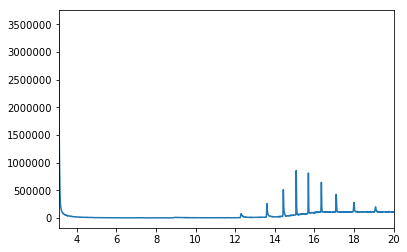

In [33]:
%matplotlib inline
datams.spectra.sum(axis=1).plot()

(2) For each time point there a X number of columns. Each column represents the strength of an ion at that timepoint. The ions are generated when a molecule hits the detector. Since only one compound (theorectically) is hitting the detector at that time(s) (the range from the beginning to the end of the peak), the pattern of the ion strenghts is a signature for that specific molecule. It is effectively a molecular fingerprint. Sometimes people like to look at this data, but more importantly people cross reference this data against a library and has the library tell them the molecule.

Below is the molecular "finger print" for the peak around 15.1 min.

,15.1086666667
50.1,0.0
50.2,0.0
50.6,0.0
50.7,0.0
50.8,0.0


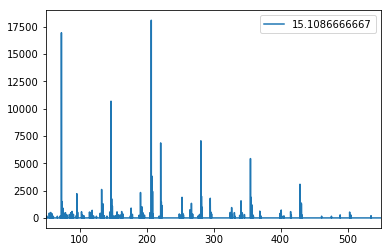

In [34]:
import pandas as pd
%matplotlib inline
example_ion_df = pd.DataFrame(datams.spectra.iloc[2101,:]).sort_index()
example_ion_df.plot()
example_ion_df.head()

A common feature of software that manipulates this data is that someone could click on a timepoint in the first plot and get a display of the second plot. Or have someway to specify a timepoint for which i want to see the ion profile.